In [23]:
import pandas as pd

# Деректерді оқу
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
df["age_years"] = (df["age"] / 365).astype(int)

# ✅ Тексеру
print("Жасты түрлендіру нәтижесі:")
print(df[["age", "age_years"]].head())
df

Жасты түрлендіру нәтижесі:
     age  age_years
0  18393         50
1  20228         55
2  18857         51
3  17623         48
4  17474         47


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [25]:
print("🔍 ap_hi бағанының минимум және максимум мәндері:")
print(df["ap_hi"].min(), df["ap_hi"].max())

print("🔍 ap_lo бағанының минимум және максимум мәндері:")
print(df["ap_lo"].min(), df["ap_lo"].max())


🔍 ap_hi бағанының минимум және максимум мәндері:
-150 16020
🔍 ap_lo бағанының минимум және максимум мәндері:
-70 11000


In [26]:

# 🔹 Артериялық қысым мәндерін тазарту:
# Шектен тыс үлкен немесе кішкентай мәндерді алып тастау
df = df[(df["ap_hi"] >= 90) & (df["ap_hi"] <= 250)]
df = df[(df["ap_lo"] >= 40) & (df["ap_lo"] <= 200)]

# 🔹 Логикалық қате: жоғары қысым төмен қысымнан аз болмауы керек
df = df[df["ap_hi"] > df["ap_lo"]]

# 🔹 Индексті қайта реттеу
df = df.reset_index(drop=True)

# 🔍 Өзгерген қысым мәндерін тексеру
print("\n✅ Қысым мәндерінен кейінгі алғашқы 5 қатар:")
print(df[["ap_hi", "ap_lo"]].head())

# 🔍 Енді минимум мен максимум мәндерді қайта тексереміз
print("\n🔍 Жаңа ap_hi минимум және максимум:")
print(df["ap_hi"].min(), df["ap_hi"].max())

print("\n🔍 Жаңа ap_lo минимум және максимум:")
print(df["ap_lo"].min(), df["ap_lo"].max())



✅ Қысым мәндерінен кейінгі алғашқы 5 қатар:
   ap_hi  ap_lo
0    110     80
1    140     90
2    130     70
3    150    100
4    100     60

🔍 Жаңа ap_hi минимум және максимум:
90 240

🔍 Жаңа ap_lo минимум және максимум:
40 182


In [27]:
from sklearn.preprocessing import StandardScaler

# Сандық белгілерді түрлендіру үшін тізім
numeric_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

# StandardScaler объектісін құру
scaler = StandardScaler()

# Сандық белгілерді масштабтау
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Егер 'cholesterol' немесе 'gluc' сияқты категориялық белгілерді түрлендіргіңіз келсе
df['cholesterol'] = df['cholesterol'].astype('category')  # Холестерин деңгейін категорияға түрлендіру
df['gluc'] = df['gluc'].astype('category')  # Қант деңгейін категорияға түрлендіру
# Деректердің типтерін тексеру
print(df.dtypes)

# Масштабталған белгілерді тексеру
print(df[numeric_features].describe())  # Масштабталған белгілердің статистикасын тексеру

# Категориялық белгілердің мәндерін тексеру
print(df['cholesterol'].value_counts())  # Холестерин деңгейі
print(df['gluc'].value_counts())  # Қант деңгейі

id                int64
age               int64
gender            int64
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke             int64
alco              int64
active            int64
cardio            int64
age_years       float64
dtype: object
          age_years        height        weight         ap_hi         ap_lo
count  6.859800e+04  6.859800e+04  6.859800e+04  6.859800e+04  6.859800e+04
mean   1.157773e-16 -2.324350e-16  1.180820e-17  1.580641e-16 -5.574712e-16
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00
min   -3.521267e+00 -1.336557e+01 -4.406621e+00 -2.208091e+00 -4.384148e+00
25%   -7.139416e-01 -6.556397e-01 -6.373620e-01 -4.043295e-01 -1.412909e-01
50%    2.482813e-02  7.762578e-02 -1.487544e-01 -4.043295e-01 -1.412909e-01
75%    7.635979e-01  6.886803e-01  5.492565e-01  7.981780e-01  9.194233e-01
max    1.650122e+00  1.046555e+01  8.78578

In [28]:
from cardio_library.preprocessing.transformer import CardioTransformer
from cardio_library.models.logistic_model import LogisticModel
from cardio_library.models.decision_tree_model import DecisionTreeModel
from cardio_library.models.random_forest_model import RandomForestModel


In [29]:
from cardio_library.utils.save_load import load_model, load_transformer
import pandas as pd
# Сақталған модель мен трансформерді жүктейміз
model = load_model("cardio_library/models/logistic_model.pkl")
transformer = load_transformer("cardio_library/preprocessing/transformer.pkl")


In [9]:
#StratifiedKFold Random Forest үшін
import pandas as pd
from sklearn.preprocessing import StandardScaler

from cardio_library.preprocessing.transformer import CardioTransformer
from cardio_library.models.random_forest_model import RandomForestModel
from cardio_library.model_selection.cross_validation import cross_validate_model

# 🔹 1. Деректерді оқу
data = pd.read_csv("cardio_train.csv", sep=";")

# 🔹 2. Трансформация
transformer = CardioTransformer()
transformer.fit(data)
X, y = transformer.transform(data)

# 🔹 3. Масштабтау
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔹 4. StratifiedKFold арқылы бағалау

results = cross_validate_model(RandomForestModel, X, y, model_name="Random Forest")

# 🔹 5. Нәтиже
print("📊 StratifiedKFold нәтижесі:")
for key, value in results.items():
    if key == "Model":
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:.4f}")



📊 StratifiedKFold нәтижесі:
accuracy: 0.7195
precision: 0.7274
recall: 0.6927
f1_score: 0.7096
roc_auc: 0.7804
Model: Random Forest


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from cardio_library.preprocessing.transformer import CardioTransformer
from cardio_library.model_selection.grid_search import perform_grid_search
from cardio_library.metrics.evaluation import evaluate_model

# 🔹 1. Деректерді оқу
# cardio_train.csv файлын оқу (бастапқы медициналық деректер)
data = pd.read_csv("cardio_train.csv", sep=";")

# 🔹 2. Трансформация
# Арнайы CardioTransformer көмегімен деректерді алдын ала өңдеу
transformer = CardioTransformer()
transformer.fit(data)         # Трансформерді деректерге сәйкестендіру
X, y = transformer.transform(data)  # X — белгілер (фичалар), y — мақсат айнымалы (cardio)

# 🔹 3. Масштабтау
# Белгілерді масштабтау (стандартизация) — барлық мәндерді орташа = 0, стандарттық ауытқу = 1 етіп түрлендіру
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔹 4. Train/Test бөлу
# Деректерді оқыту және тест жиынына бөлу
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# stratify=y дегеніміз — train/test жиындарында класстардың үлесі бірдей сақталады

# 🔍 GridSearch арқылы ең үздік RandomForest моделін табу
print("🔍 GridSearch + StratifiedKFold басталды...")
best_rf = perform_grid_search('random_forest', X_train, y_train)
# perform_grid_search — RandomForestClassifier моделі үшін бірнеше параметр комбинациясын сынап, ең жақсысын қайтарады
# Ішінде StratifiedKFold қолданылып, кросс-валидация жасалады

# 📊 Үздік модельді бағалау
print("📊 Ең үздік Random Forest моделінің бағалануы:")
rf_metrics = evaluate_model(
    y_test,
    best_rf.predict(X_test),              # Тест жиынында класс болжау
    best_rf.predict_proba(X_test)[:, 1]  # Ауру болу ықтималдығы (1-класс үшін)
)

# Нәтижені көрсету
for metric, value in rf_metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}: {value}")
# Бұл цикл барлық метрикаларды (accuracy, precision, recall, f1_score, roc_auc) әдемі форматтап шығарады
 

🔍 GridSearch + StratifiedKFold басталды...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
📊 Ең үздік Random Forest моделінің бағалануы:
accuracy: 0.7320
precision: 0.7574
recall: 0.6742
f1_score: 0.7134
roc_auc: 0.8008


In [12]:
import pickle
from cardio_library.metrics.evaluation import plot_confusion, plot_roc_curve

# 🔹 Деректерді жүктеу
with open("model_preds.pkl", "rb") as f:
    model_preds = pickle.load(f)

with open("model_probas.pkl", "rb") as f:
    model_probas = pickle.load(f)

with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

model_names = list(model_preds.keys())



🔎 Logistic Regression — Қате матрицасы:


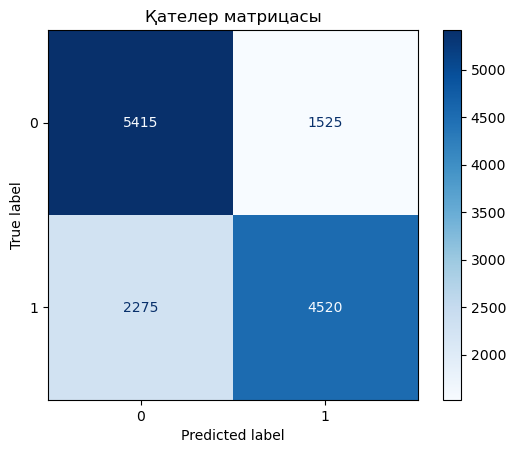


🔎 Decision Tree — Қате матрицасы:


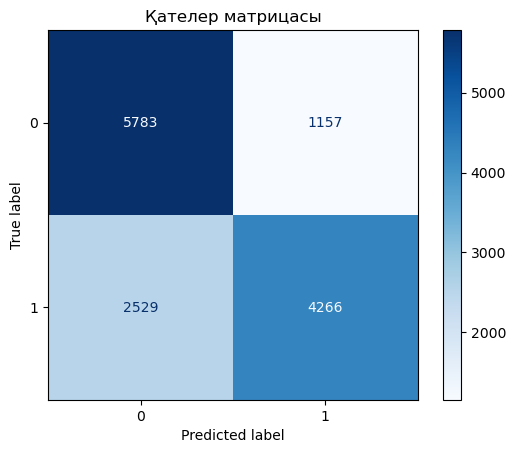


🔎 Random Forest — Қате матрицасы:


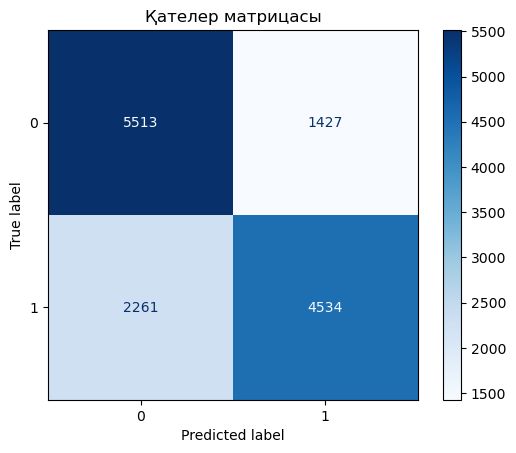

In [13]:
for name in model_names:
    print(f"\n🔎 {name} — Қате матрицасы:")
    plot_confusion(y_test, model_preds[name])



🔬 Logistic Regression — ROC қисығы:


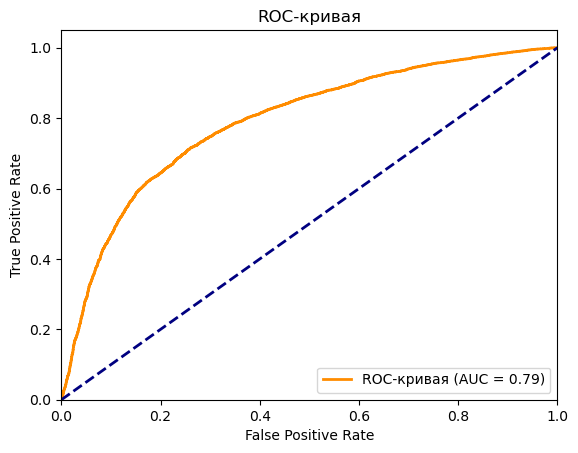


🔬 Decision Tree — ROC қисығы:


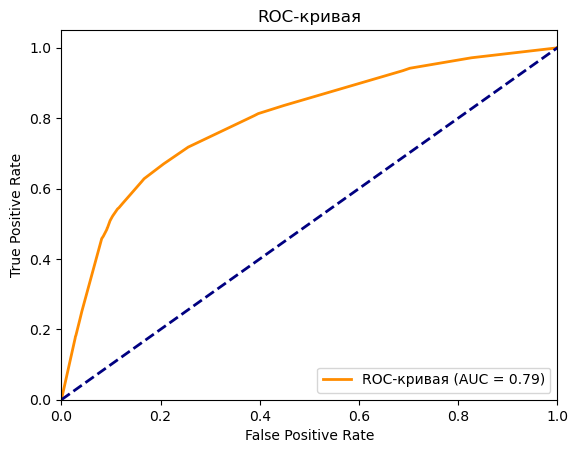


🔬 Random Forest — ROC қисығы:


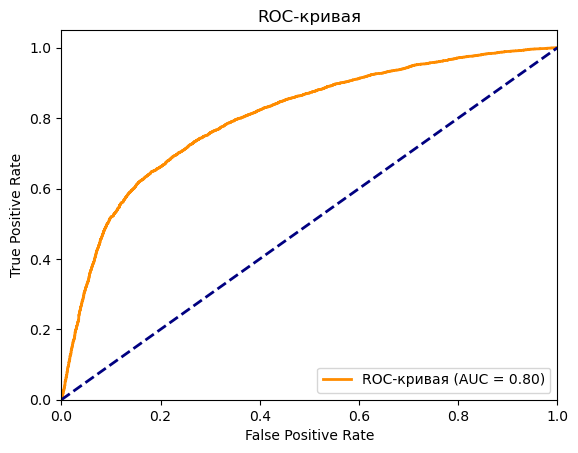

In [14]:
for name in model_names:
    print(f"\n🔬 {name} — ROC қисығы:")
    plot_roc_curve(y_test, model_probas[name])


C:\Users\14ken\cardio_library_project\cardio_library\metrics\evaluation.py:109: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\14ken\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


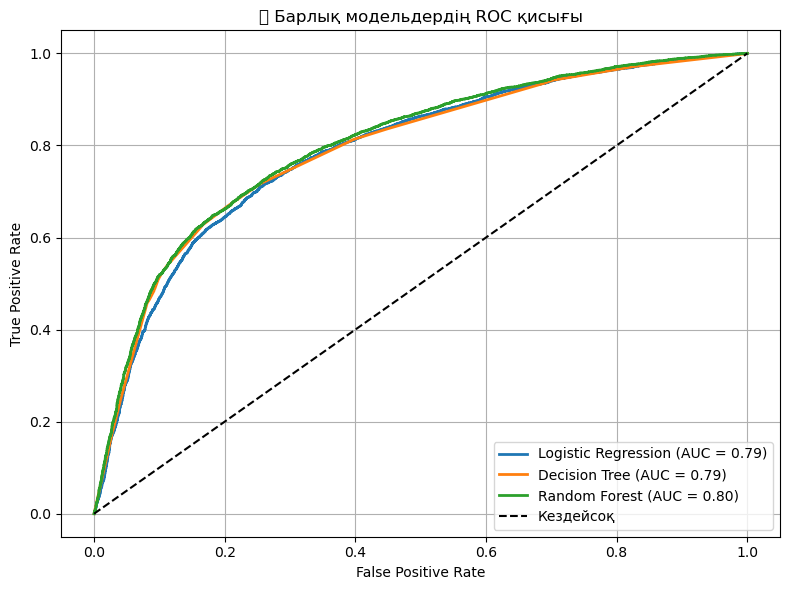

In [16]:
from cardio_library.metrics.evaluation import plot_multiple_roc_curves
plot_multiple_roc_curves(y_test, model_probas)
